In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA

from torch_linregr import *

# Integrating CPHS Data and Code

## Load Data

In [2]:
import pickle

with open(r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Data\continuous_full_data_block1.pickle", 'rb') as handle:
    #refs_block1, poss_block1, dec_vels_block1, int_vel_block1, emgs_block1, Ws_block1, Hs_block1, alphas_block1, pDs_block1, times_block1, conditions_block1 = pickle.load(handle)
    refs_block1, _, _, _, emgs_block1, _, _, _, _, _, _ = pickle.load(handle)

#with open(r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Data\continuous_full_data_block2.pickle", 'rb') as handle:
#    #refs_block2, poss_block2, dec_vels_block2, int_vel_block2, emgs_block2, Ws_block2, Hs_block2, alphas_block2, pDs_block2, times_block2, conditions_block2 = pickle.load(handle)
#    refs_block2, _, _, _, emgs_block2, _, _, _, _, _, _ = pickle.load(handle)

In [3]:
keys = ['METACPHS_S106', 'METACPHS_S107', 'METACPHS_S108', 'METACPHS_S109', 'METACPHS_S110', 'METACPHS_S111', 'METACPHS_S112', 'METACPHS_S113', 'METACPHS_S114', 'METACPHS_S115', 'METACPHS_S116', 'METACPHS_S117', 'METACPHS_S118', 'METACPHS_S119']
num_conds = 8
num_channels = 64
num_updates = 19
cphs_starting_update = 10
update_ix = [0,  1200,  2402,  3604,  4806,  6008,  7210,  8412,  9614, 10816, 12018, 13220, 14422, 15624, 16826, 18028, 19230, 20432, 20769]

In [4]:
lambdaF = 0
lambdaD = 1e-10
lambdaE = 1e-6
lambdasFDE=[lambdaF, lambdaD, lambdaE]

learning_rate = 0.0001

In [5]:
print("Condition 1")
F1tens_full = torch.from_numpy(emgs_block1[keys[0]][0, :, :]).type(torch.float32)
PREF1tens_full = torch.from_numpy(refs_block1[keys[0]][0, :, :]).type(torch.float32)

print(f"EMG Input size: {F1tens_full.size()}")
print(f"2D Velocity Label size: {PREF1tens_full.size()}")

Condition 1
EMG Input size: torch.Size([20770, 64])
2D Velocity Label size: torch.Size([20770, 2])


## PyTorch Linear Regression With Full Dataset

In [6]:
num_updates = 19
starting_update = 0
normalize_emg = False
pca_channel_default = 64
PCA_comps = 64

total_epochs_FullData = 500

Norm of Final s: 33486.9140625
Norm of emg_streamed_batch: 33485.25
Norm of D: 0.7220438122749329
Norm of V: 1.0000001192092896



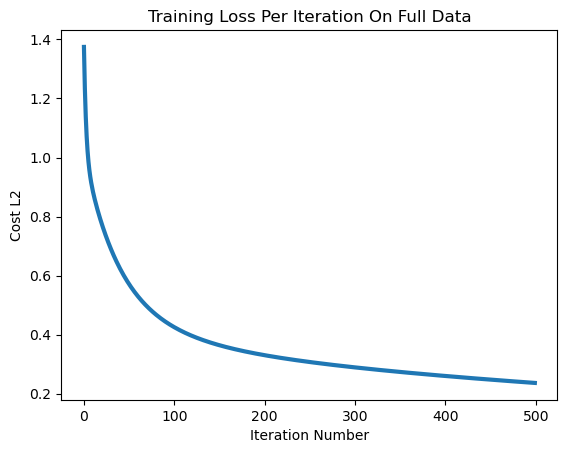

In [7]:
num_input_channels = 64  # Change once I add PCA
input_size = num_input_channels
output_size = 2  # 2D Velocity

# Other option which should give same result:
untrained_model_FullData = torch.nn.Linear(input_size, output_size)  # Single layer nn for Lin Regr
optimizer = torch.optim.SGD(untrained_model_FullData.parameters(), lr=learning_rate)

trained_model_FullData, loss_log_FullData = full_train_linregr_updates(untrained_model_FullData, F1tens_full, PREF1tens_full, learning_rate, num_iters_per_update=total_epochs_FullData, lambdasFDE=[lambdaF, lambdaD, lambdaE], stream_data_updates=False, use_full_input_data=True, normalize_V=True, starting_update=0)

plt.plot(range(len(loss_log_FullData)), loss_log_FullData, linewidth=3)
plt.title("Training Loss Per Iteration On Full Data")
plt.xlabel('Iteration Number')
plt.ylabel('Cost L2')
plt.show()

## PyTorch Linear Regression With Streamed Data

In [8]:
num_updates = 19
starting_update = 0
normalize_emg = False
pca_channel_default = 64
PCA_comps = 64

input_size = num_input_channels
output_size = 2  # 2D Velocity

Norm of Final s: 7412.6767578125
Norm of emg_streamed_batch: 7408.75
Norm of D: 0.7752379179000854
Norm of V: 0.9999999403953552

Norm of Final s: 12297.6005859375
Norm of emg_streamed_batch: 12284.8759765625
Norm of D: 0.7627822756767273
Norm of V: 1.0

Norm of Final s: 7849.21923828125
Norm of emg_streamed_batch: 7846.20166015625
Norm of D: 0.7590304017066956
Norm of V: 0.9999998807907104

Norm of Final s: 9085.3828125
Norm of emg_streamed_batch: 9081.1572265625
Norm of D: 0.757427990436554
Norm of V: 1.0000001192092896

Norm of Final s: 6062.30810546875
Norm of emg_streamed_batch: 6060.45361328125
Norm of D: 0.7560874223709106
Norm of V: 0.9999999403953552

Norm of Final s: 7455.37158203125
Norm of emg_streamed_batch: 7454.99169921875
Norm of D: 0.7548991441726685
Norm of V: 1.0

Norm of Final s: 6500.22705078125
Norm of emg_streamed_batch: 6496.6533203125
Norm of D: 0.7541723251342773
Norm of V: 1.0

Norm of Final s: 8494.28125
Norm of emg_streamed_batch: 8493.7568359375
Norm of D:

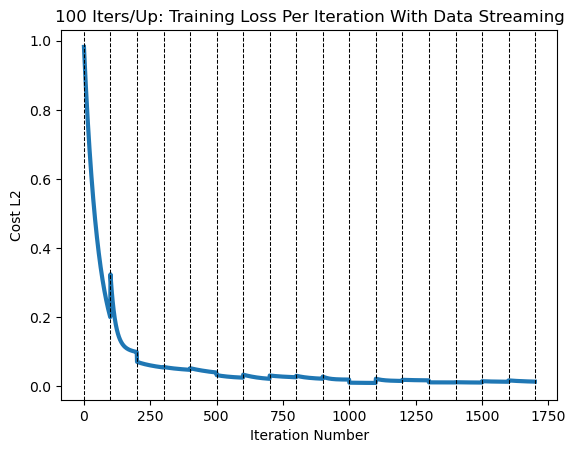

In [9]:
num_iters_per_update = 100

num_input_channels = 64  # Change once I add PCA
input_size = num_input_channels
output_size = 2  # 2D Velocity

untrained_model_NoFL = torch.nn.Linear(input_size, output_size)  # Single layer nn for Lin Regr
optimizer = torch.optim.SGD(untrained_model_NoFL.parameters(), lr=learning_rate)

trained_model_NoFL, loss_log_NoFL = full_train_linregr_updates(untrained_model_NoFL, F1tens_full, PREF1tens_full, learning_rate, lambdasFDE=[lambdaF, lambdaD, lambdaE], normalize_V=True, num_iters_per_update=num_iters_per_update, starting_update=0)

plt.plot(range(len(loss_log_NoFL)), loss_log_NoFL, linewidth=3)
plt.title("100 Iters/Up: Training Loss Per Iteration With Data Streaming")
update_advancement_idxs = range(0,num_iters_per_update*(num_updates-1), num_iters_per_update)
for i in update_advancement_idxs:
    plt.axvline(i, linewidth=0.75, linestyle='--', color='black')
plt.xlabel('Iteration Number')
plt.ylabel('Cost L2')
plt.show()

## Redo but with FL Data Processing Turned On

In [10]:
# PARAMS
num_updates = 9
starting_update = 10
normalize_emg = True
pca_channel_default = 64
PCA_comps = 7

# BUILD MODEL
num_input_channels = PCA_comps 
input_size = num_input_channels
# ^ IRL I'm not sure we are guaranteed to get equalength trials
#  Thus may be better to do every time point individually? Not sure
output_size = 2  # 2D Velocity

Norm of Final s: 0.34891974925994873
Norm of emg_streamed_batch: 0.3486567735671997
Norm of D: 0.771580696105957
Norm of V: 1.0

Norm of Final s: 0.5611228942871094
Norm of emg_streamed_batch: 0.5609199404716492
Norm of D: 0.771580696105957
Norm of V: 1.0000001192092896

Norm of Final s: 0.5182949304580688
Norm of emg_streamed_batch: 0.5180097222328186
Norm of D: 0.771580696105957
Norm of V: 1.0

Norm of Final s: 0.5161062479019165
Norm of emg_streamed_batch: 0.5157821774482727
Norm of D: 0.771580696105957
Norm of V: 0.9999999403953552

Norm of Final s: 0.4567073881626129
Norm of emg_streamed_batch: 0.4566686451435089
Norm of D: 0.771580696105957
Norm of V: 0.9999999403953552

Norm of Final s: 0.5579748153686523
Norm of emg_streamed_batch: 0.557861864566803
Norm of D: 0.771580696105957
Norm of V: 1.0000001192092896

Norm of Final s: 0.4937291741371155
Norm of emg_streamed_batch: 0.49277186393737793
Norm of D: 0.771580696105957
Norm of V: 0.9999998807907104



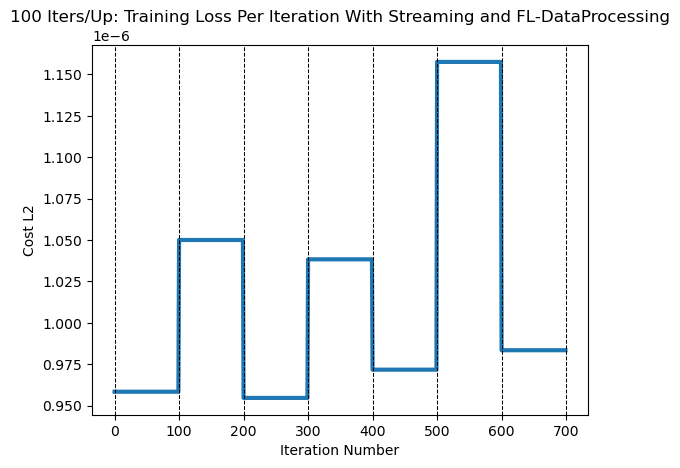

In [11]:
num_iters_per_update=100

untrained_model_FLDP100 = torch.nn.Linear(input_size, output_size)  # Single layer nn for Lin Regr
optimizer = torch.optim.SGD(untrained_model_FLDP100.parameters(), lr=learning_rate)

trained_model_FLDP100, loss_log_FLDP100 = full_train_linregr_updates(untrained_model_FLDP100, F1tens_full, PREF1tens_full, learning_rate, num_iters_per_update=num_iters_per_update, lambdasFDE=[lambdaF, lambdaD, lambdaE], starting_update=10, normalize_V=True, normalize_emg=True, PCA_comps=7, loss_log=[])

plt.plot(range(len(loss_log_FLDP100)), loss_log_FLDP100, linewidth=3)
plt.title("100 Iters/Up: Training Loss Per Iteration With Streaming and FL-DataProcessing")
update_advancement_idxs = range(0,num_iters_per_update*(num_updates-1), num_iters_per_update)
for i in update_advancement_idxs:
    plt.axvline(i, linewidth=0.75, linestyle='--', color='black')
plt.xlabel('Iteration Number')
plt.ylabel('Cost L2')
plt.show()

Investigating why the above code is trash with static cost functions

Don't Normalize EMG but do use PCA

Norm of Final s: 2368.89306640625
Norm of emg_streamed_batch: 2367.107177734375
Norm of D: 0.9344201683998108
Norm of V: 1.0

Norm of Final s: 5350.3642578125
Norm of emg_streamed_batch: 5348.42919921875
Norm of D: 0.9135168194770813
Norm of V: 1.0000001192092896

Norm of Final s: 3402.39990234375
Norm of emg_streamed_batch: 3400.52783203125
Norm of D: 0.8398648500442505
Norm of V: 0.9999999403953552

Norm of Final s: 2850.306640625
Norm of emg_streamed_batch: 2848.5166015625
Norm of D: 0.8196159601211548
Norm of V: 0.9999997615814209

Norm of Final s: 3093.620849609375
Norm of emg_streamed_batch: 3093.358642578125
Norm of D: 0.8075658082962036
Norm of V: 1.0

Norm of Final s: 4448.76708984375
Norm of emg_streamed_batch: 4447.8662109375
Norm of D: 0.7940637469291687
Norm of V: 1.0

Norm of Final s: 3168.70556640625
Norm of emg_streamed_batch: 3162.56201171875
Norm of D: 0.7759243249893188
Norm of V: 0.9999998211860657



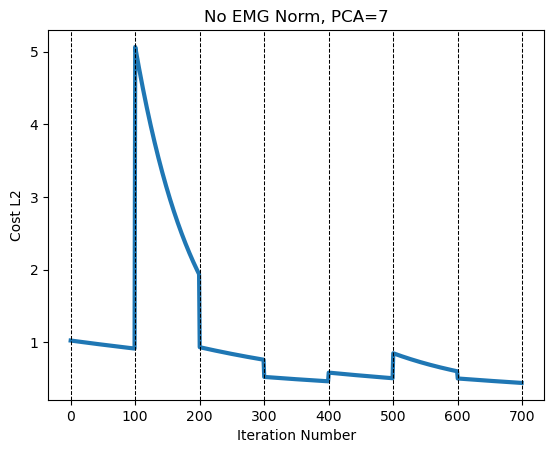

In [12]:
# PARAMS
num_updates = 9
starting_update = 10
normalize_emg = False
pca_channel_default = 64
PCA_comps = 7

#######################################################################

num_iters_per_update=100

num_input_channels = PCA_comps  # Change once I add PCA
input_size = num_input_channels
output_size = 2  # 2D Velocity

untrained_model_FLDP100 = torch.nn.Linear(input_size, output_size)  # Single layer nn for Lin Regr
optimizer = torch.optim.SGD(untrained_model_FLDP100.parameters(), lr=learning_rate)

trained_model_FLDP100, loss_log_FLDP100 = full_train_linregr_updates(untrained_model_FLDP100, F1tens_full, PREF1tens_full, learning_rate, num_iters_per_update=num_iters_per_update, normalize_V=True, starting_update=10, lambdasFDE=[lambdaF, lambdaD, lambdaE], normalize_emg=normalize_emg, PCA_comps=PCA_comps, loss_log=[])

plt.plot(range(len(loss_log_FLDP100)), loss_log_FLDP100, linewidth=3)
plt.title("No EMG Norm, PCA=7")
update_advancement_idxs = range(0,num_iters_per_update*(num_updates-1), num_iters_per_update)
for i in update_advancement_idxs:
    plt.axvline(i, linewidth=0.75, linestyle='--', color='black')
plt.xlabel('Iteration Number')
plt.ylabel('Cost L2')
plt.show()